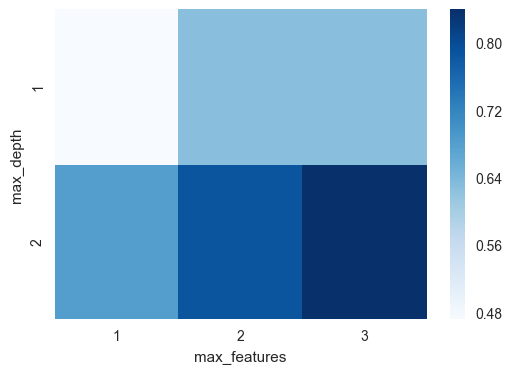

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
%matplotlib inline

twitter_data = pd.read_csv('Homework_3rd_Account_Decision_Tree.csv')
#twitter_data.head()
#twitter_data.describe()

#twitter_data.dropna()
#sb.pairplot(twitter_data.dropna(), hue='class')

all_inputs = twitter_data[['test', 'speak about(to)/see you', 'blog']].values
all_classes = twitter_data['class'].values

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1,2],
                  'max_features': [1,2,3]}

cross_validation = StratifiedKFold(all_classes, n_folds=5)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(all_inputs, all_classes)


grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (2, 3)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(2) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')


#本題接續第2題進行分析，首先將特定時間範圍內的所有tweet列印出來，包含其user name,text,及description欄位等資料，找尋20個感興趣的帳號後，
#將使用帳號區分為“Engineer”,"Author","Speaker"等三類（完全依照descriprion欄位資料來判定），並從text欄位資訊中萃取出“test”,
#”speak about（to）/ see you“, 及“blog”等三類關鍵字，然後將各屬性統整在Homework_3rd_Account_Decision_Tree2.csv中（因為程序繁複
#故無呈現在程試之中），可以發現如果在text中出現“test”關鍵字，其幾乎為Engineer;如果出現“speak about（to）/ see you”時，也有極高的機率
#是Speaker，而剩下的幾乎為Author（其中text會有“blog”關鍵字出現），最後將結果呈現於heatmap圖之中，可得知愈多feature訊息符合或愈深度分析
#時，命中class的機率愈高。